# AOMA vs FEM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dataloader_halogaland.dataloader as dl
from dataloader_halogaland.plot import plotModeShape
import os
from strid.utils import modal_assurance_criterion
from results import ModeTrace

/Users/emilneby/miniforge3/envs/master/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Load results from AOMA

In [2]:
AOMA_loader = dl.HDF5_result_loader(path=os.getcwd()+'/../Referencebased_Cov-SSI/results/output_6_AOMA.h5')

In [3]:
all_modes = AOMA_loader.get_modes_all_periods()
temps, mean_wind_speed, max_wind_speed, mean_wind_direction, execution_time = AOMA_loader.get_statistics()

In [4]:
print(len(all_modes))

1168


### Load results from FEM model

In [5]:
FEM_loader = dl.FEM_result_loader(path=os.getcwd()+ '/../../../FEM/HalogalandModel_exportmodal.h5')

FEM_modes = FEM_loader.get_all_modes()
f= FEM_loader.f
phis_FEM = FEM_loader.phi
print(type(FEM_modes))

<class 'list'>


## Analyze mode traces

In [6]:
tracer = ModeTrace(FEM_modes[:20], len(all_modes))
tracer.add_all_modes(all_modes)

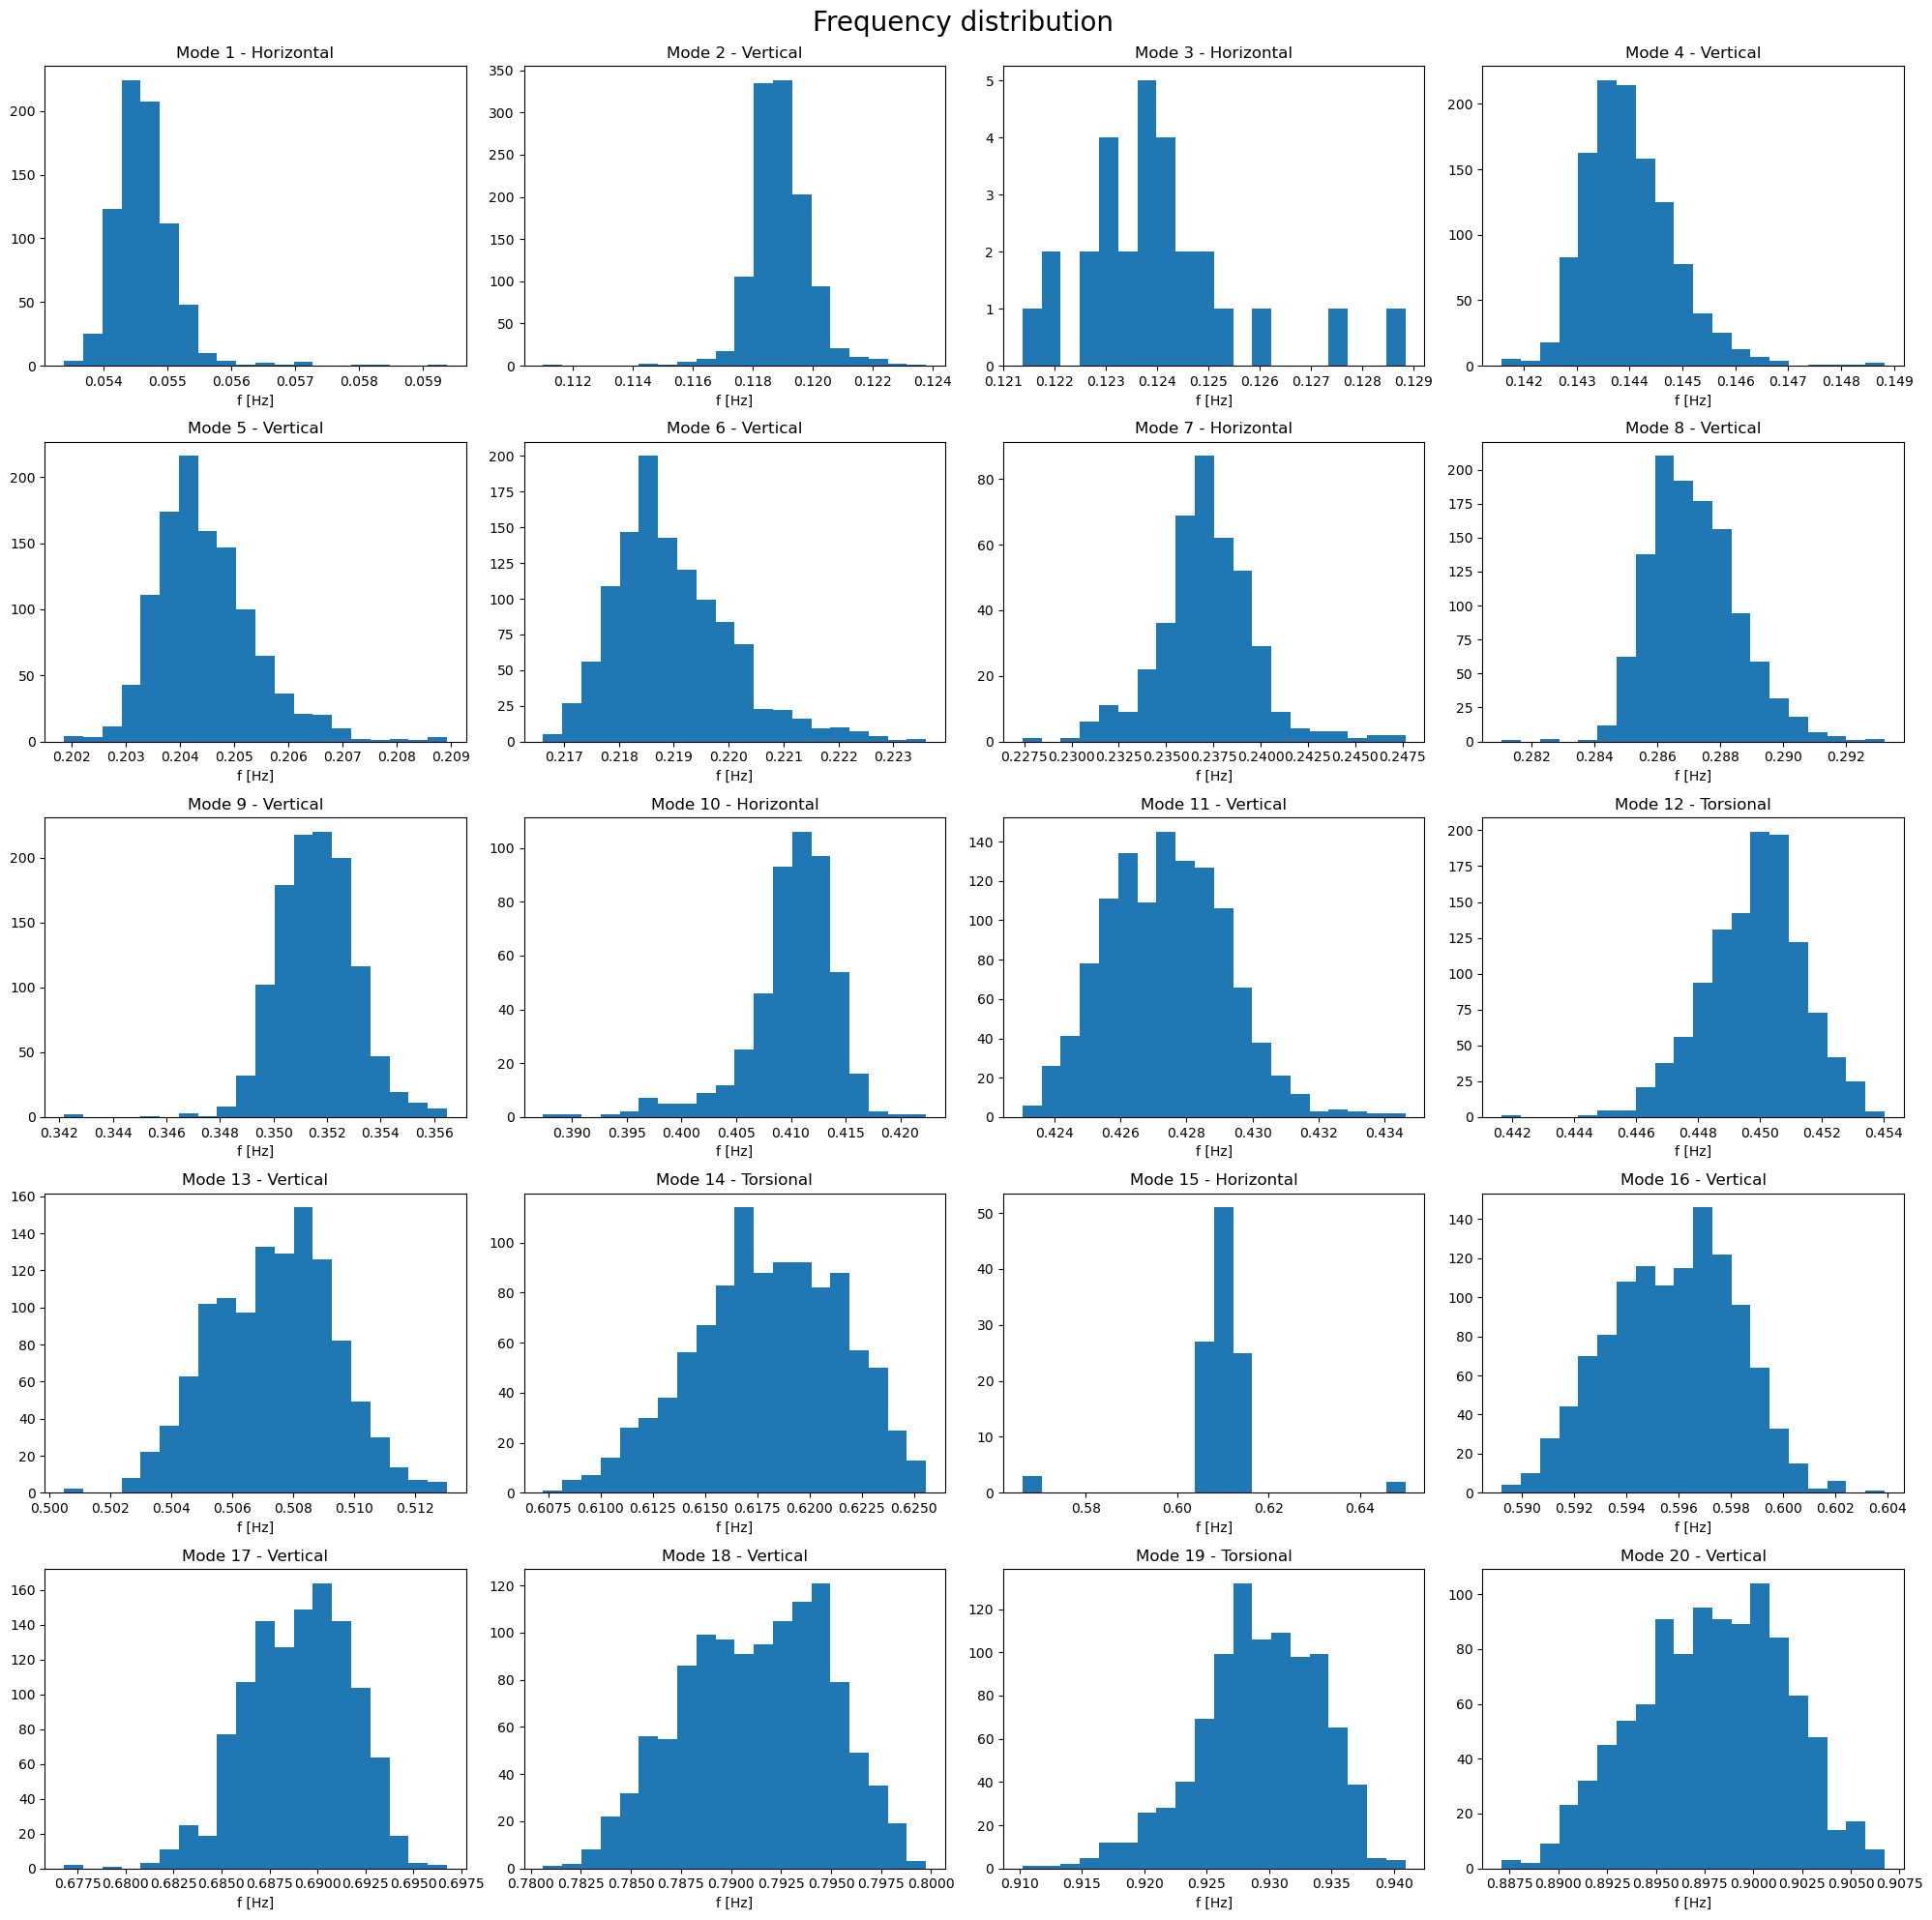

In [7]:
freq_dist = tracer.plot_frequency_distribution()
plt.savefig('frequency_distribution.jpg')

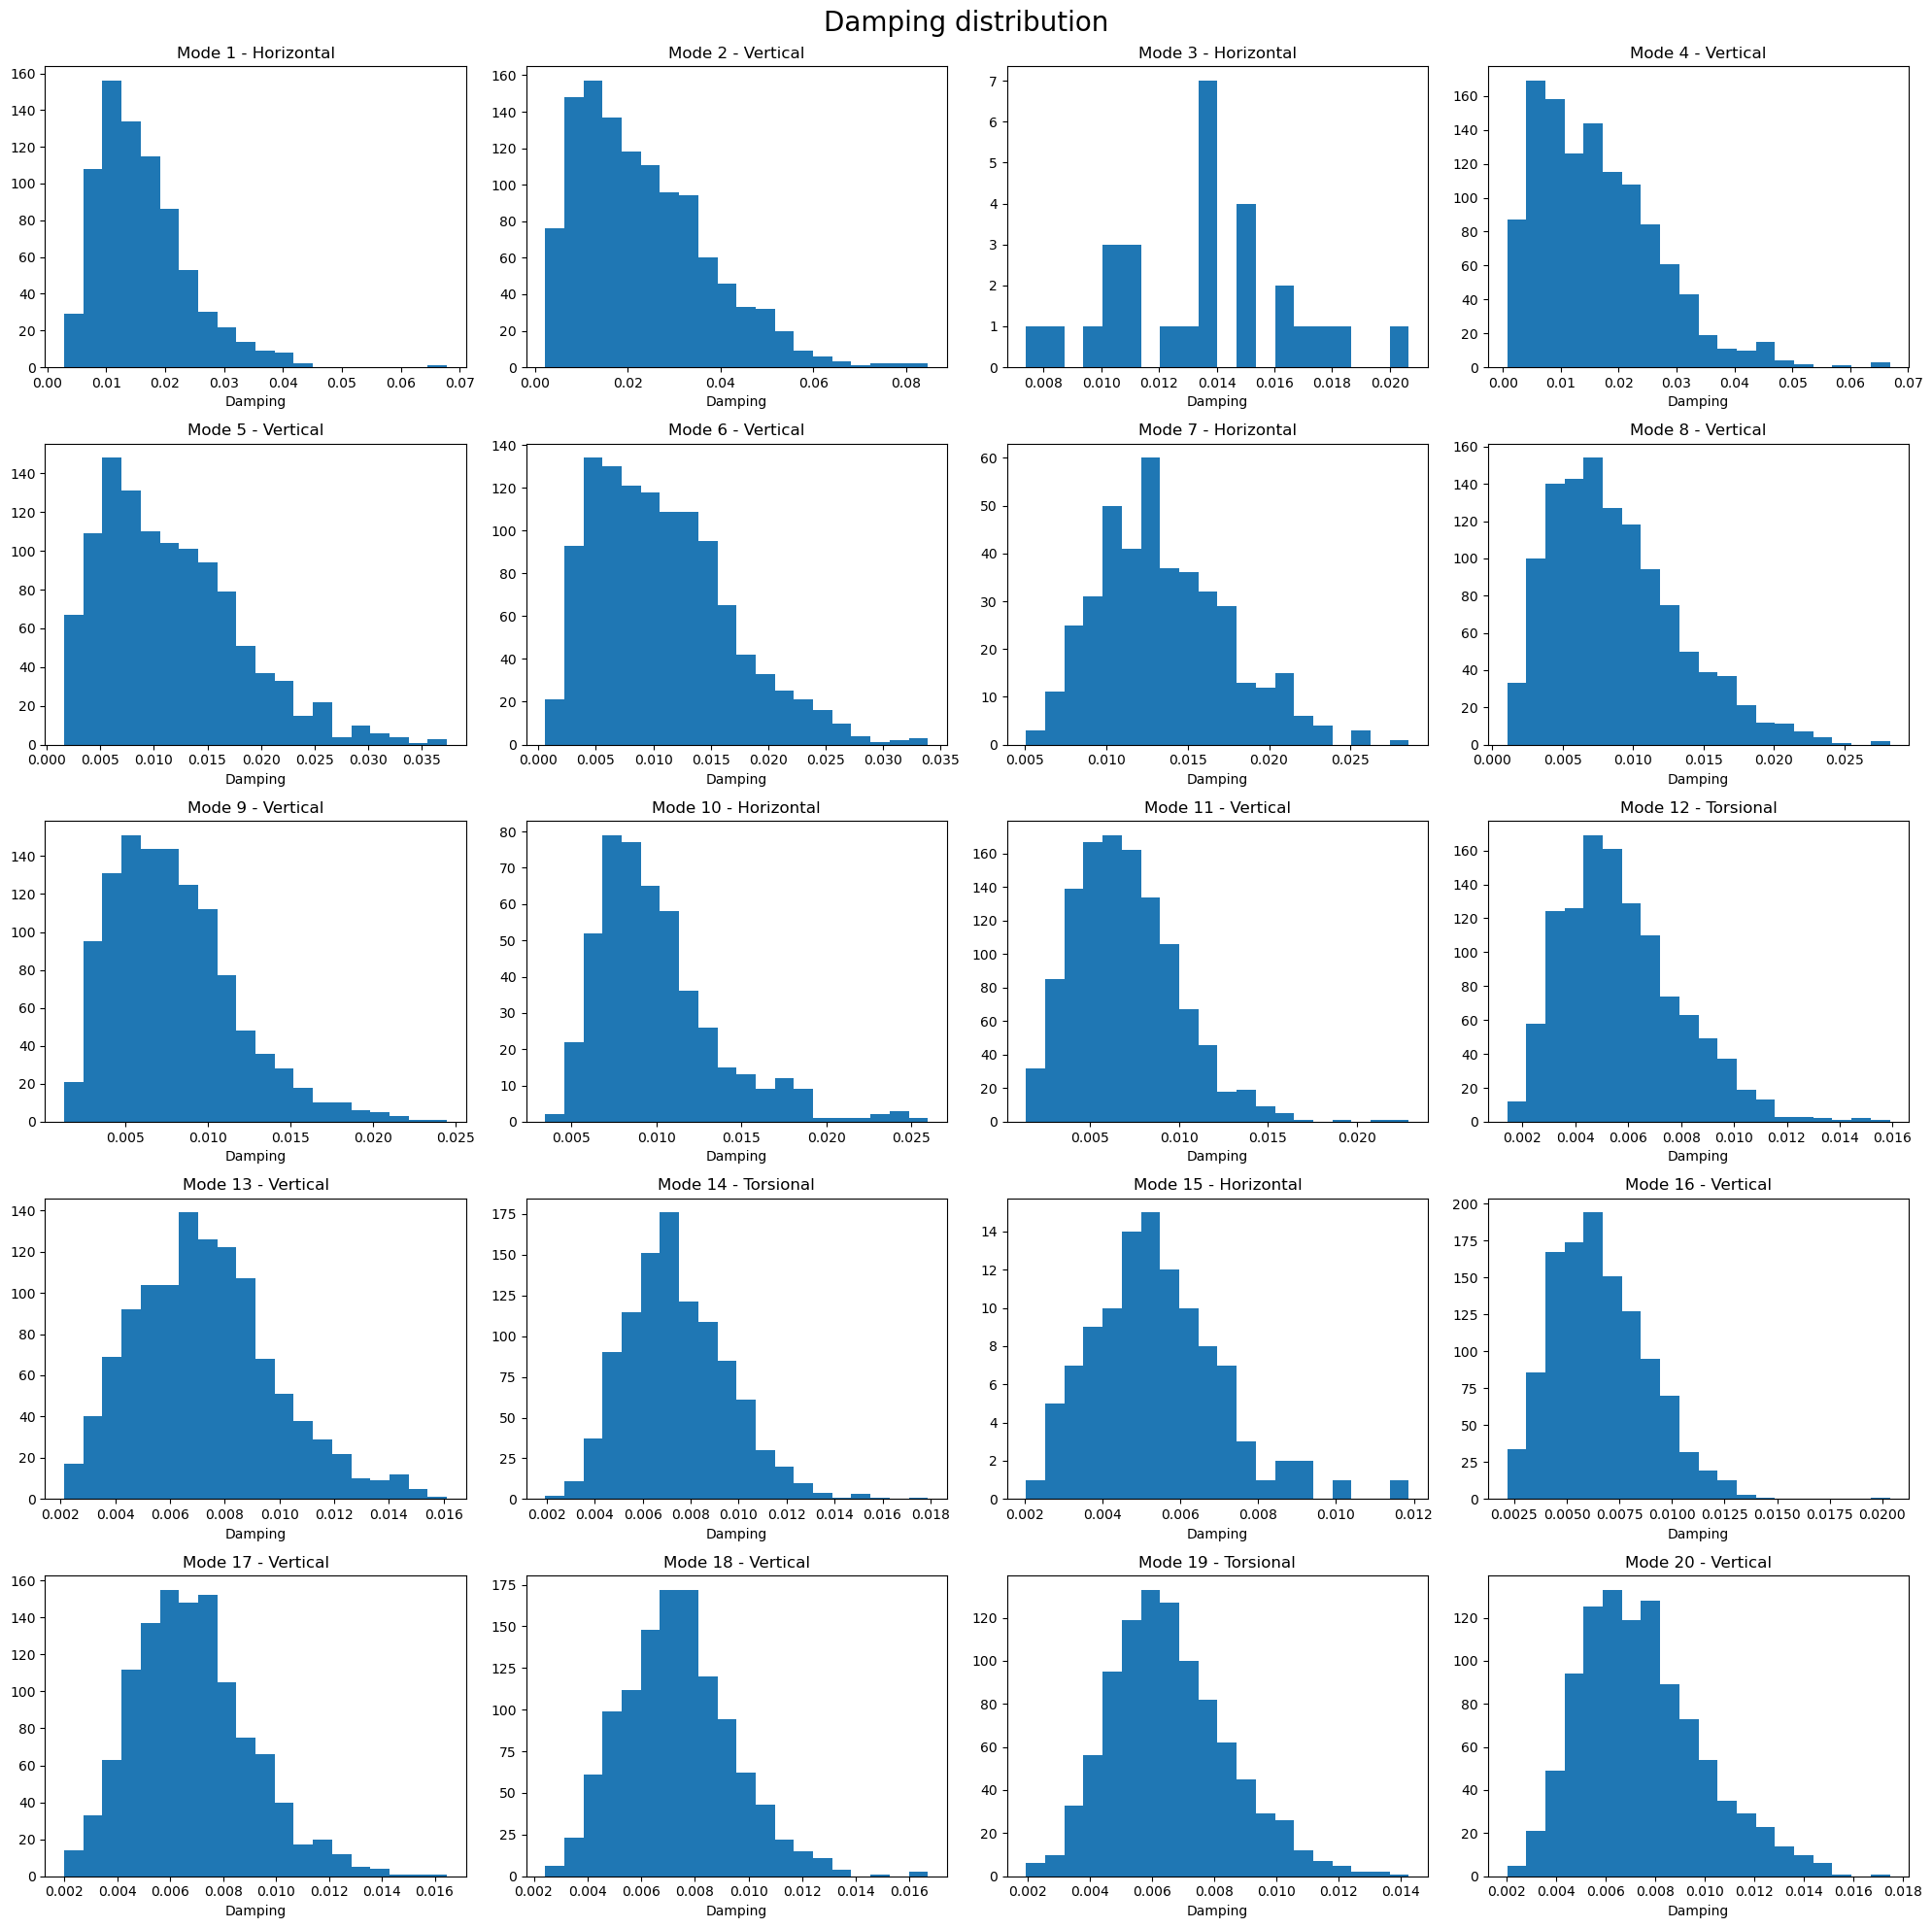

In [8]:
damp_dist = tracer.plot_damping_distribution()
plt.savefig('damping_distribution.jpg')

### Temperatur indusert fleksibilitet

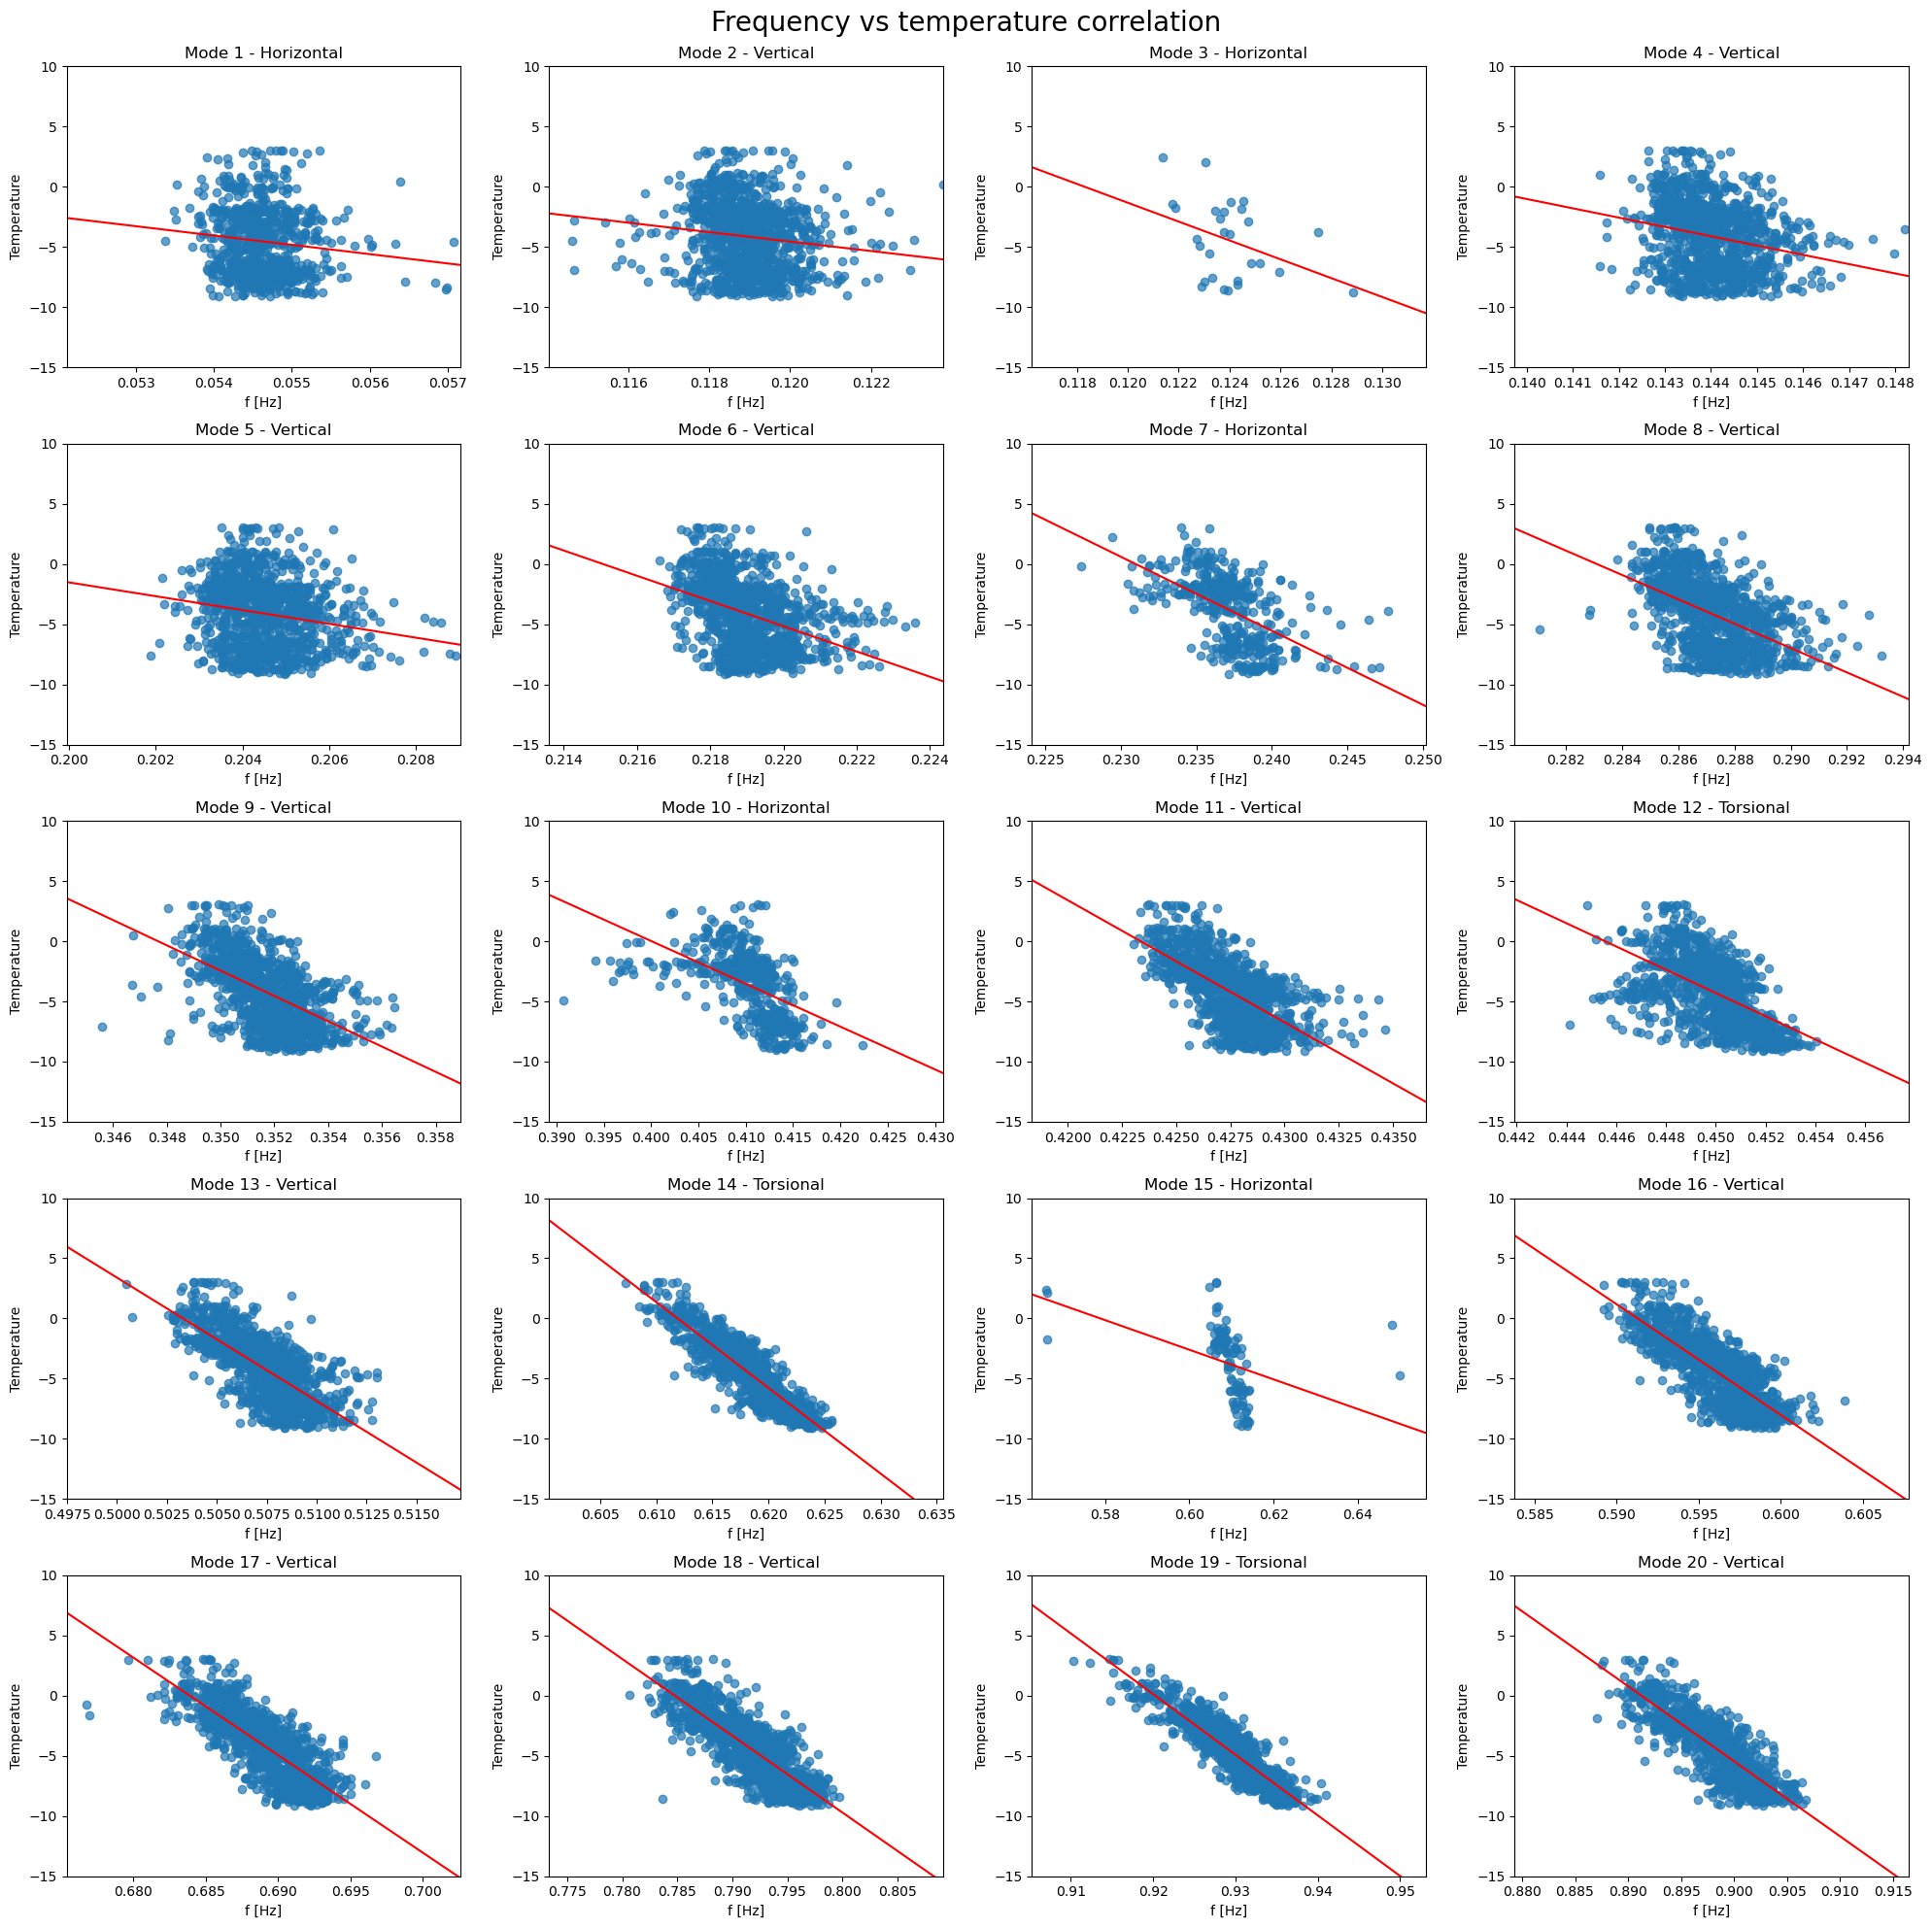

In [9]:
freq_vs_temp = tracer.plot_freq_vs_temp_corr(temps)
plt.savefig('temp_induced_flexibility.jpg')

### Vindindusert demping

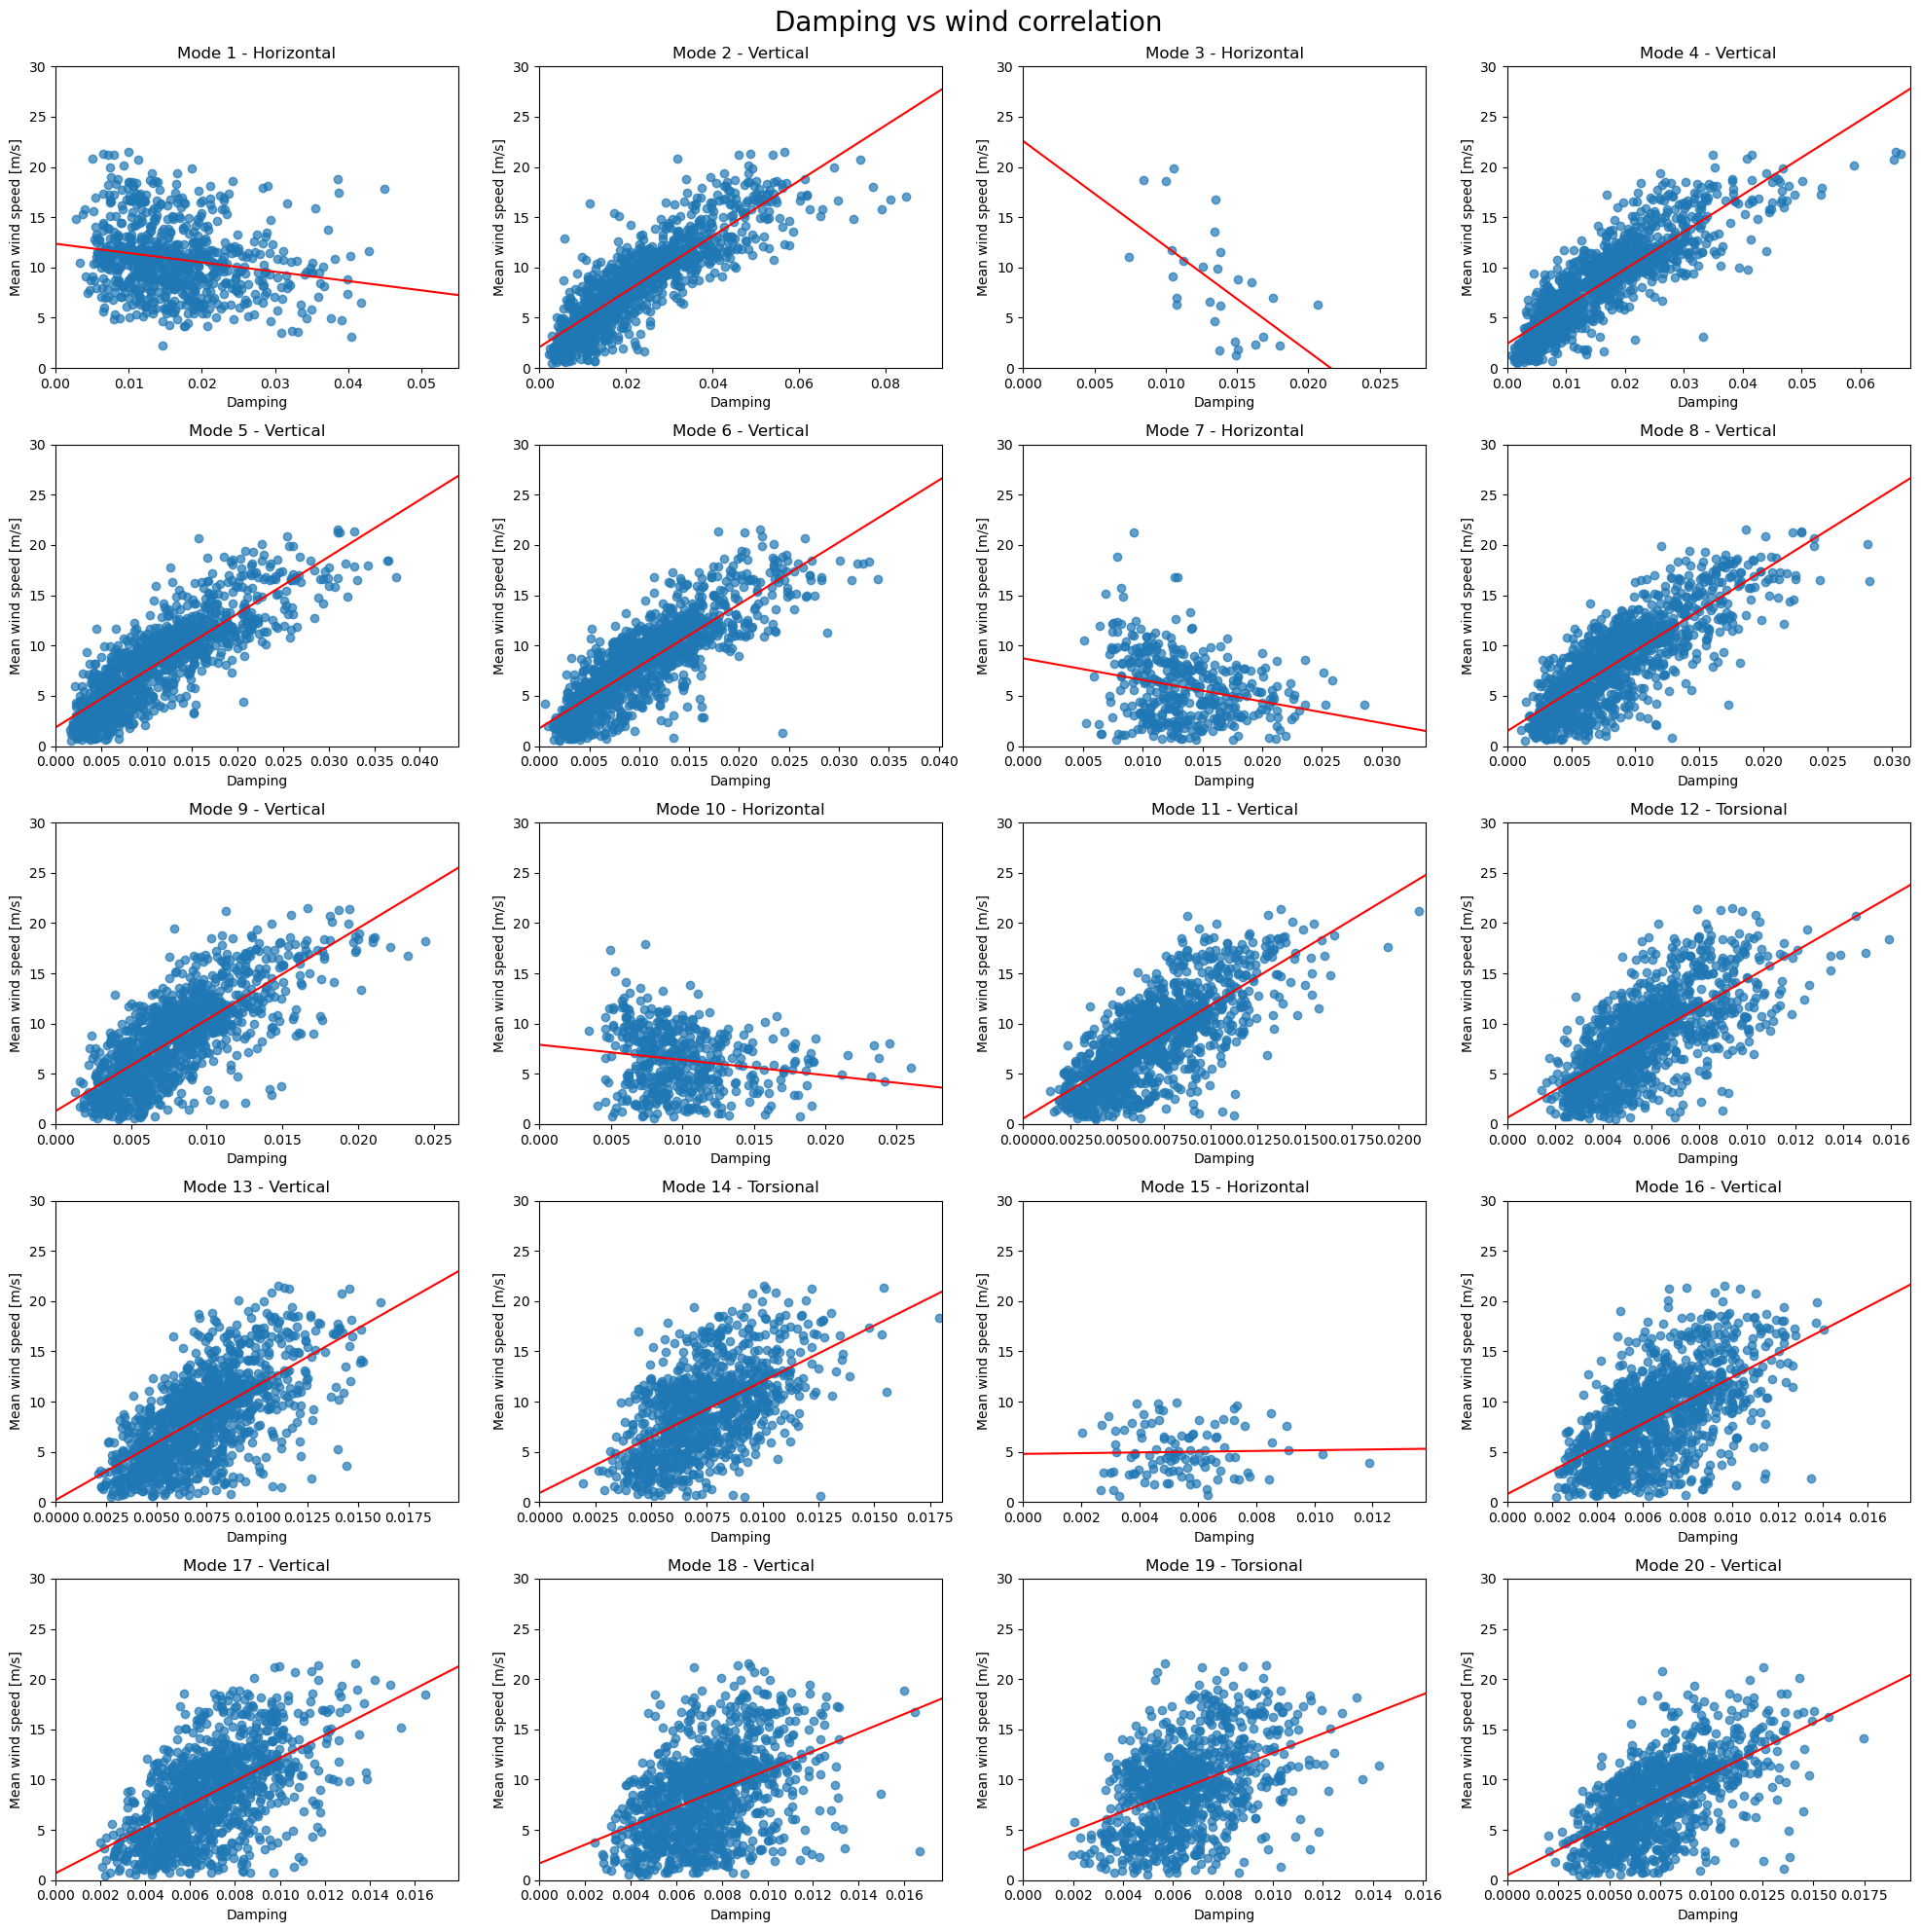

In [10]:
damp_vs_wind = tracer.plot_damp_vs_wind_corr(mean_wind_speed)
plt.savefig('wind_induced_damping.jpg')